In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
NUM_ACTIONS = 5
NUM_SAMPLES = 10000

In [3]:
def sample() -> np.ndarray:
    return np.random.randn(NUM_ACTIONS)*[10,10,10,10,10] + [5,5,5,5,5]

<h1> Why E[max_a Q(a)] - max_a E[Q(a)] > 0 </h1>

It would be better to think of Q(a) as independent random variables rather than functions. In the example below, E[Q] = [5,4,3,2,1] where each entry of the vector is E[Q(a)]. Let's verify that this is the case for samples drawn for a gaussian distribution with mean 3 and variance 4.

In [4]:
Q = sample()
for i in range(10000):
    Q = Q + sample()
Q_sum = Q/10000. 
Q_sum

array([4.99442349, 4.99944305, 4.99809501, 4.84056535, 4.92408229])

As can be seen from above, E[Q] = [5,4,3,2,1]. This implies max_a E[Q(a)] = 5 or argmax_a E[Q(a)] = 0th action.

In [5]:
print("max_a E[Q(a)] is",np.max(Q_sum))
print("argmax_a E[Q(a)] is",np.argmax(Q_sum))

max_a E[Q(a)] is 4.999443053574826
argmax_a E[Q(a)] is 1


<h1> Lets compute E[max_a Qhat(a)] </h1>

In [6]:
Qhat_sum = 0.
for i in range(10000):
    Qhat = np.max(sample())
    Qhat_sum+= Qhat
Qhat_sum/10000.

16.667519726560982

This is E[max_a Q(a)] and as can be seen, its overestimated with significant positive bias

<h1> Let's now try E[argmax_a Q2(a)] 

0.5064754076471675


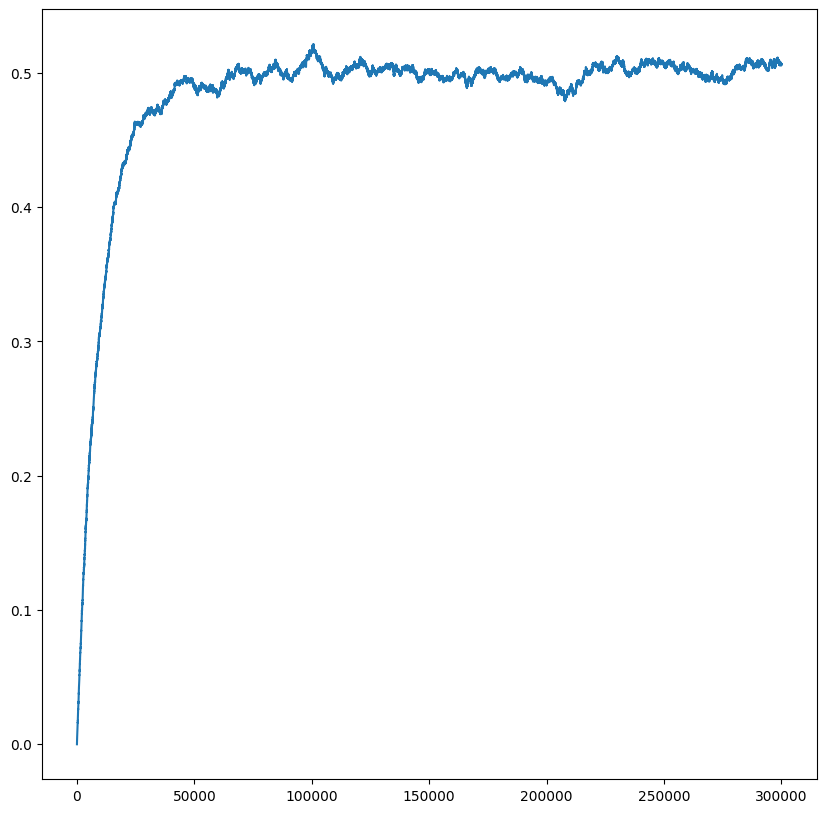

In [7]:
Qhat_sum = 0.
Qhat_plot = []
fig = plt.figure(figsize=(10,10))
for i in range(300000):
    Qhat1 = 0.1* sample()
    Qhat2 = 0.1* sample()
    argmax = np.argmax(Qhat1)
    Qhat_sum= Qhat_sum +  0.0001*(Qhat2[argmax] - Qhat_sum)
    Qhat_plot.append(Qhat_sum)
plt.plot(Qhat_plot)
print(Qhat_sum)